In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [164]:
df = pd.read_csv('data/Customers.csv')

In [165]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [166]:
df.shape

(2000, 8)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [168]:
df.drop('CustomerID', axis = 1, inplace = True)

In [169]:
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])

Text(0, 0.5, 'Contagem')

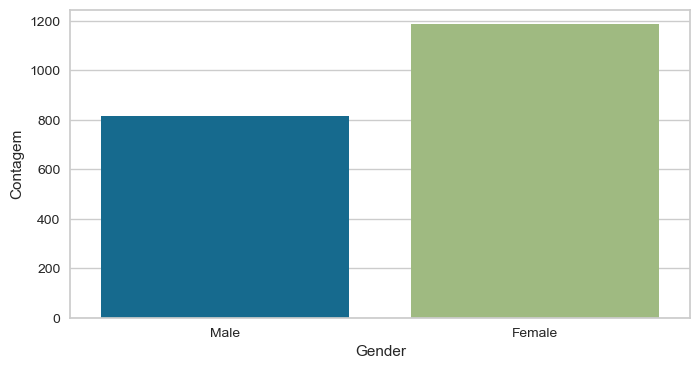

In [170]:
plt.figure(figsize = (8, 4))
g = sns.countplot(x = 'Gender', data = df, orient = 'h')
g.set_ylabel('Contagem')

Text(0, 0.5, 'Contagem')

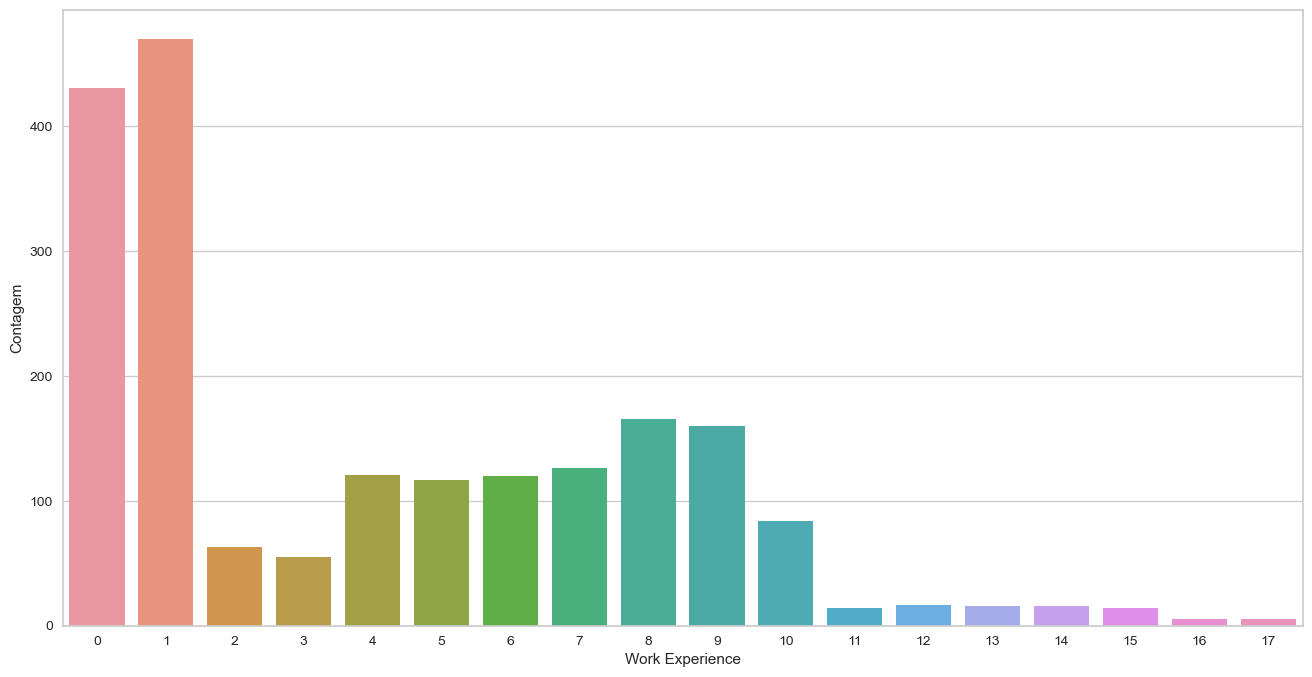

In [171]:
plt.figure(figsize = (16, 8))
g = sns.countplot(x = 'Work Experience', data = df, orient = 'h')
g.set_ylabel('Contagem')

Text(0, 0.5, 'Contagem')

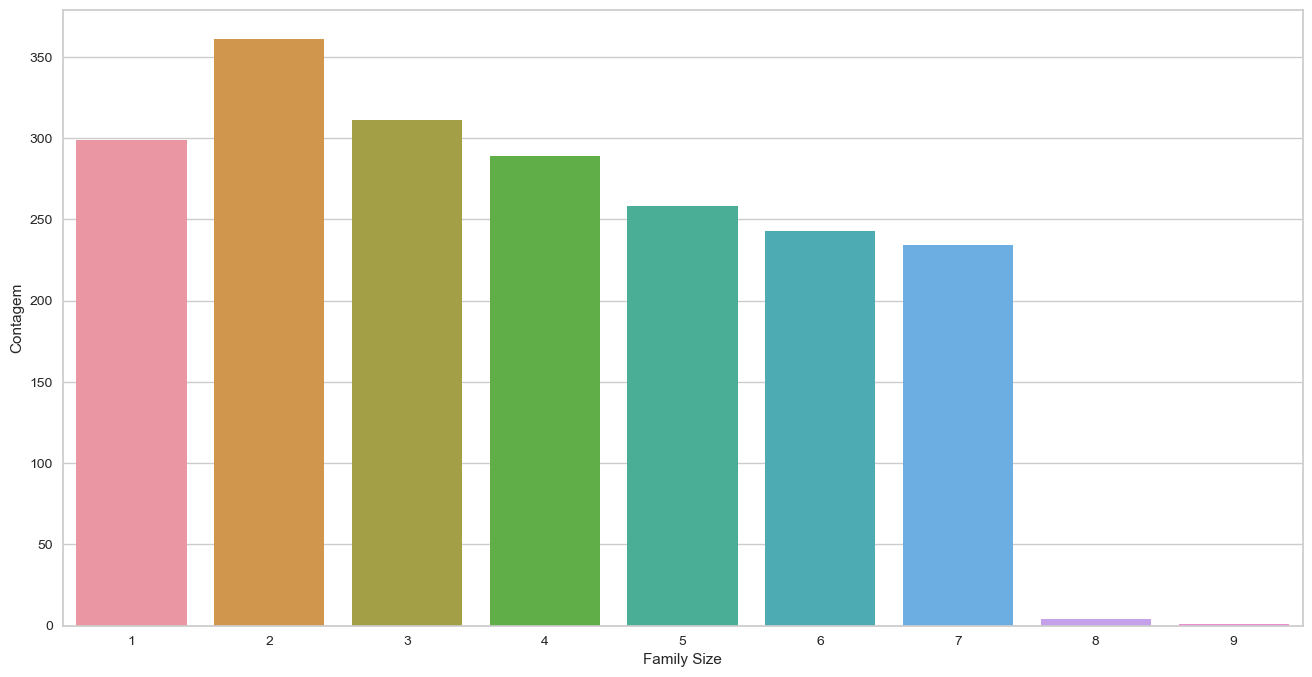

In [172]:
plt.figure(figsize = (16, 8))
g = sns.countplot(x = 'Family Size', data = df, orient = 'h')
g.set_ylabel('Contagem')

Text(0, 0.5, 'Contagem')

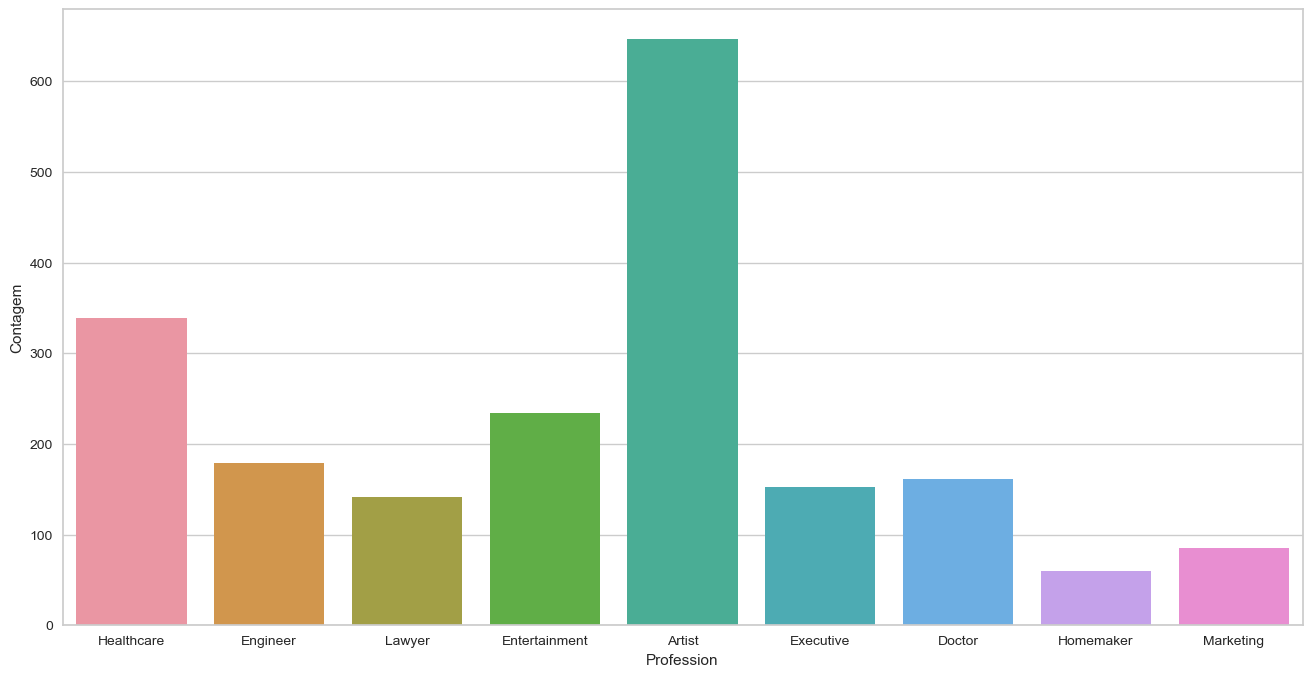

In [173]:
plt.figure(figsize = (16, 8))
g = sns.countplot(x = 'Profession', data = df, orient = 'h')
g.set_ylabel('Contagem')

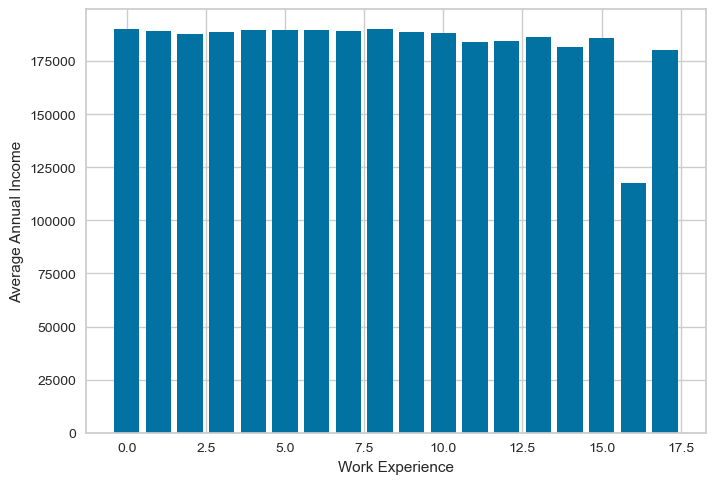

In [174]:
plt.bar(df['Work Experience'], df['Annual Income ($)'])
plt.xlabel('Work Experience')
plt.ylabel('Average Annual Income')
plt.show()

<AxesSubplot:>

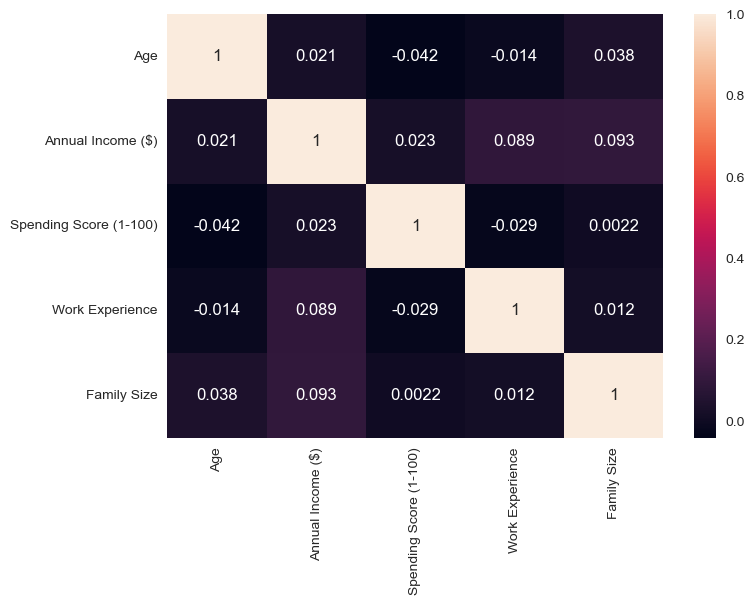

In [175]:
sns.heatmap(df.corr(), annot = True)

## LabelEncoder

In [176]:
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Profession'] = le.fit_transform(df['Profession'])

### Tentei usar o treinar o modelo para prever "Spending Score (1-100)", porem, não tive sucesso, fiz varios testes com os dados e nunca tinha um resultado bom. 
### Partirei para a Clusterização

<img src = "data/pycaret-status.png">

## Clustering

In [177]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import numpy as np

In [178]:
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,19,15000,39,5,1,4
1,1,21,35000,81,2,3,3
2,0,20,86000,6,2,1,1
3,0,23,59000,77,7,0,2
4,0,31,38000,40,3,2,6


## determinando o número max de clusters

In [179]:
limit = int((df.shape[0]//2)**0.5)
  
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(df)
    pred = model.predict(df)
    score = silhouette_score(df, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 2: 0.618
Silhouette Score for k = 3: 0.558
Silhouette Score for k = 4: 0.533
Silhouette Score for k = 5: 0.560
Silhouette Score for k = 6: 0.570
Silhouette Score for k = 7: 0.548
Silhouette Score for k = 8: 0.541
Silhouette Score for k = 9: 0.552
Silhouette Score for k = 10: 0.555
Silhouette Score for k = 11: 0.555
Silhouette Score for k = 12: 0.549
Silhouette Score for k = 13: 0.553
Silhouette Score for k = 14: 0.542
Silhouette Score for k = 15: 0.549
Silhouette Score for k = 16: 0.540
Silhouette Score for k = 17: 0.547
Silhouette Score for k = 18: 0.544
Silhouette Score for k = 19: 0.550
Silhouette Score for k = 20: 0.551
Silhouette Score for k = 21: 0.541
Silhouette Score for k = 22: 0.543
Silhouette Score for k = 23: 0.541
Silhouette Score for k = 24: 0.539
Silhouette Score for k = 25: 0.540
Silhouette Score for k = 26: 0.540
Silhouette Score for k = 27: 0.548
Silhouette Score for k = 28: 0.546
Silhouette Score for k = 29: 0.545
Silhouette Score for k = 30:

In [180]:
# Dados
ss = StandardScaler()
X = ss.fit_transform(df)

# Reduzindo as dimensões
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

# Fit KMeans
kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans.fit(X_pca)
pred = kmeans.predict(X_pca)

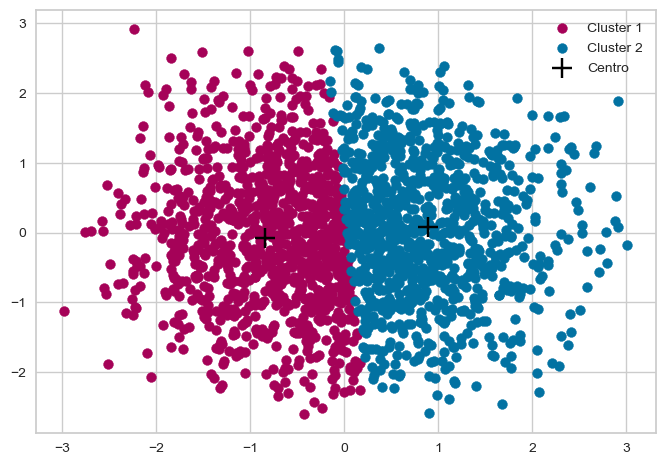

In [181]:
# Plotando todos os clusters
cores = ['m', 'b']
for i in range(len(cores)):
    plt.scatter(X_pca[pred == i, 0], X_pca[pred == i, 1], s = 50, c = cores[i], label = 'Cluster ' + str(i+1))
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, marker = '+', c = 'black', label = 'Centro')
plt.legend()
plt.show()

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# dados
X = df.drop(['Spending Score (1-100)'], axis = 1)
y = df['Spending Score (1-100)']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)

# treino
l = Lasso()
l.fit(xtrain, ytrain)

# Predict
y_pred = l.predict(xtest)

In [198]:
# resultados
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.3f}')

RMSE: 28.175


_